Section 1

In [19]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam_v2
from keras.datasets import fashion_mnist
import tensorflow as ts
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

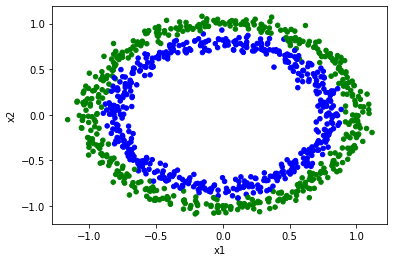

In [20]:
x, label = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=None, factor=0.8)
x1 = x[:, 0]
x2 = x[:, 1]
circles = pd.DataFrame({'x1': x1, 'x2': x2, 'label': label})
colors_array = np.where(circles.label == 1, 'b', 'g')
circles.plot.scatter(x='x1', y='x2', c=colors_array)
x_train, x_test, label_train, label_test = train_test_split(x, label, stratify=label, random_state=10)
plt.show()

Epoch 1/50
24/24 [==============================] - 1s 2ms/step - loss: 3.7068 - accuracy: 0.4627
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 2.0200 - accuracy: 0.4573
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7405 - accuracy: 0.4920
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7154 - accuracy: 0.5000
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.7056 - accuracy: 0.5000
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7000 - accuracy: 0.5000
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.4800
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4733
Epoch 10/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4360
Epoch 11/50
24/24 [

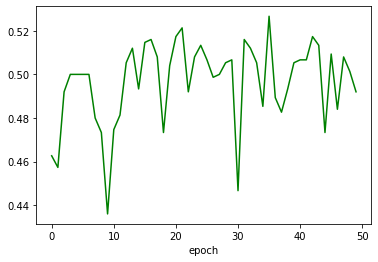

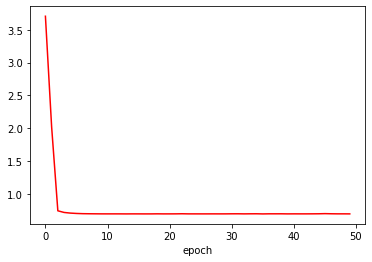

43.6


In [21]:
model1 = Sequential()
model1.add(Dense(50, input_dim=2))
model1.add(Dense(40))
model1.add(Dense(1))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
l = model1.fit(x_train, label_train, epochs=50)
_, accuracy = model1.evaluate(x_train, label_train)
accuracy = accuracy*100
print("Accuracy:")
print(accuracy)
plt.plot(l.history['accuracy'], color='green', label='Accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(l.history['loss'], color='red', label='Loss')
plt.xlabel('epoch')
plt.show()
predicts = (model1.predict(x_test) > 0.5).astype(int)
counter = 0
for i in range(len(predicts)):
    if label_test[i] == predicts[i]:
        counter = counter + 1 
print(counter/len(predicts)*100)

همانطور که می‌دانیم شبکه‌ی عصبی چندلایه بدون تابع فعال‌ساز در واقع معادل یک شبکه تک لایه است و یک شبکه‌ی تک لایه تنها می‌تواند فضا را با یک خط به دو بخش تقسیم کند. باتوجه به اینکه مسئله جدا پذیر خطی نیست، از این روش نمی‌توانیم برای حل این مسئله استفاده کنیم.

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 3.8103 - accuracy: 0.4653
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 1.0346 - accuracy: 0.4613
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.7140 - accuracy: 0.4680
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5160
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4920
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4973
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.4840
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.4840
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4587
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4893
Epoch 11/50
24/24 [

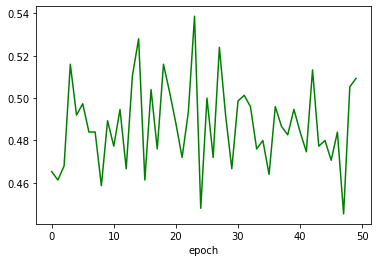

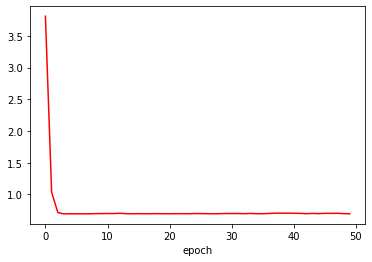

50.4


In [22]:
model2 = Sequential()
model2.add(Dense(50, input_dim=2, activation='linear'))
model2.add(Dense(40, activation='linear'))
model2.add(Dense(1, activation='linear'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
l = model2.fit(x_train, label_train, epochs=50)
_, accuracy = model2.evaluate(x_train, label_train)
accuracy = accuracy*100
print("Accuracy:")
print(accuracy)
plt.plot(l.history['accuracy'], color='green', label='Accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(l.history['loss'], color='red', label='Loss')
plt.xlabel('epoch')
plt.show()
predicts = (model2.predict(x_test) > 0.5).astype(int)
counter = 0
for i in range(len(predicts)):
    if label_test[i] == predicts[i]:
        counter = counter + 1 
print(counter/len(predicts)*100)

در این حالت نیز نتیجه مانند حالت قبل می‌شود(در حالتی که تابع فعالیت خطی داریم)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.5000
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.5267
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2425 - accuracy: 0.5600
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.2401 - accuracy: 0.6227
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2370 - accuracy: 0.6133
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.6027
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.7453
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2275 - accuracy: 0.7040
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.8227
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2196 - accuracy: 0.7387
Epoch 11/50
24/24 [

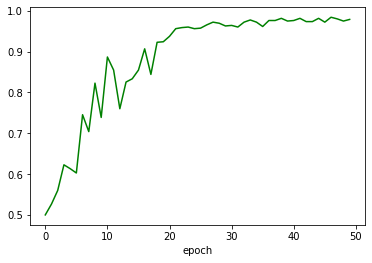

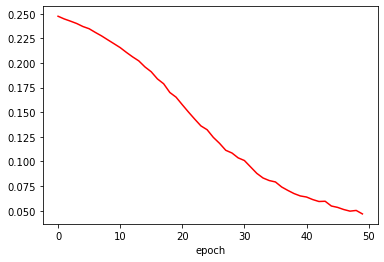

98.8


In [23]:
model3 = Sequential()
model3.add(Dense(50, input_dim=2))
model3.add(Dense(40, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
l = model3.fit(x_train, label_train, epochs=50)
_, accuracy = model3.evaluate(x_train, label_train)
accuracy = accuracy*100
print("Accuracy:")
print(accuracy)
plt.plot(l.history['accuracy'], color='green', label='Accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(l.history['loss'], color='red', label='Loss')
plt.xlabel('epoch')
plt.show()
predicts = (model3.predict(x_test) > 0.5).astype(int)
counter = 0
for i in range(len(predicts)):
    if label_test[i] == predicts[i]:
        counter = counter + 1 
print(counter/len(predicts)*100)

همانطور که مشاهده می‌شود استفاده ترکیبی از دو تابع فعالیت relu و sigmoid نتیجه‌ی بسیار بهتری به ما داده است و همچنین استفاده از خطای mean-square error نتیجه‌ی بهتری به ما داده است.

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.4707
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.4627
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.5160
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.5080
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.5267
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.5160
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.5160
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2504 - accuracy: 0.4840
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.5147
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.5200
Epoch 11/50
24/24 [

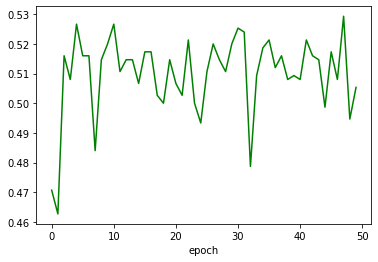

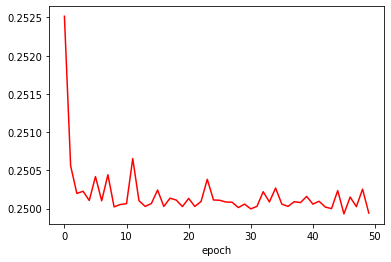

48.4


In [24]:
model4 = Sequential()
model4.add(Dense(50, input_dim=2))
model4.add(Dense(1, activation = 'sigmoid'))
model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
l = model4.fit(x_train, label_train, epochs=50)
_, accuracy = model4.evaluate(x_train, label_train)
accuracy = accuracy*100
print("Accuracy:")
print(accuracy)
plt.plot(l.history['accuracy'], color='green', label='Accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(l.history['loss'], color='red', label='Loss')
plt.xlabel('epoch')
plt.show()
predicts = (model4.predict(x_test) > 0.5).astype(int)
counter = 0
for i in range(len(predicts)):
    if label_test[i] == predicts[i]:
        counter = counter + 1 
print(counter/len(predicts)*100)

همانطور که مشاهده می‌شود با کم کردن لایه‌ها نتیجه‌ی خوبی بدست نیامده است و نتیجه بددتر شده است

In [25]:
model5 = Sequential()
model5.add(Dense(50, input_dim=2))
model5.add(Dense(40, activation = 'relu'))
model5.add(Dense(1, activation = 'sigmoid'))
model5.compile(loss='mean_squared_error', optimizer=adam_v2.Adam(learning_rate=0.0000005), metrics=['accuracy'])
l = model5.fit(x_train, label_train, epochs=50)
_, accuracy = model5.evaluate(x_train, label_train)
accuracy = accuracy*100
print("Accuracy:")
print(accuracy)


Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.5000
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.5000
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2644 - accuracy: 0.5000
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.5000
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2644 - accuracy: 0.5000
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.5000
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.5000
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.5000
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.5000
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.5000
Epoch 11/50
24/24 [

In [26]:
model6 = Sequential()
model6.add(Dense(50, input_dim=2))
model6.add(Dense(40, activation = 'relu'))
model6.add(Dense(1, activation = 'sigmoid'))
model6.compile(loss='mean_squared_error', optimizer=adam_v2.Adam(learning_rate=5), metrics=['accuracy'])
l = model6.fit(x_train, label_train, epochs=50)
_, accuracy = model6.evaluate(x_train, label_train)
accuracy = accuracy*100
print("Accuracy:")
print(accuracy)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.4893
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.5000
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.5000
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.5000
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.5000
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.5000
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.5000
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.5000
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.5000
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.5000
Epoch 11/50
24/24 [

In [27]:
model7 = Sequential()
model7.add(Dense(50, input_dim=2))
model7.add(Dense(40, activation = 'relu'))
model7.add(Dense(1, activation = 'sigmoid'))
model7.compile(loss='mean_squared_error', optimizer=adam_v2.Adam(learning_rate=0.001), metrics=['accuracy'])
l = model7.fit(x_train, label_train, epochs=50)
_, accuracy = model7.evaluate(x_train, label_train)
accuracy = accuracy*100
print("Accuracy:")
print(accuracy)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.5000
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.5173
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.5893
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2393 - accuracy: 0.5507
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.5960
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.7680
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.8160
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.7507
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.7213
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.8320
Epoch 11/50
24/24 [

In [28]:
model8 = Sequential()
model8.add(Dense(50, input_dim=2))
model8.add(Dense(40, activation = 'relu'))
model8.add(Dense(1, activation = 'sigmoid'))
model8.compile(loss='mean_squared_error', optimizer=adam_v2.Adam(learning_rate=0.02), metrics=['accuracy'])
l = model8.fit(x_train, label_train, epochs=50)
_, accuracy = model8.evaluate(x_train, label_train)
accuracy = accuracy*100
print("Accuracy:")
print(accuracy)


Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.5573
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.6280
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.6347
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.7280
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.7707
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.8173
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.8413
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9267
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9400
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9187
Epoch 11/50
24/24 [

طبق گفته سوال مقادیر نرخ یادگیری متفاوتی را تست کرده‌ایم و بهترین نتیجه برای ۰.۰۰۱ بدست آمده است، همانطور که مشاهده می‌شود با زیاد شدن نرخ یادگیری صحت کاهش می‌یابد زیرا حول نقطه ی مورد نظر با سرعت زیادی نوسان میکند و همچنین با کم کردن نرخ یادگیری نیز صحت کم می‌شود زیرا با سرعت کمتری حرکت می‌کند حال بهترین مقدار برای نرخ یادگیری ۰.۰۰۱ و ۰.۰۲ و در این محدوده‌ها می‌باشد

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.5053
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 0.5160
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2420 - accuracy: 0.5627
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2399 - accuracy: 0.6027
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.6280
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.6147
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.7347
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.6920
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2218 - accuracy: 0.7907
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.7787
Epoch 11/50
24/24 [

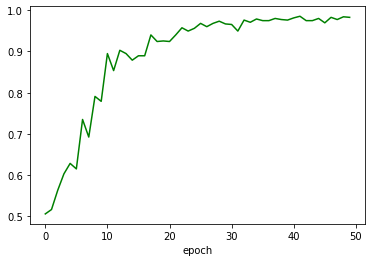

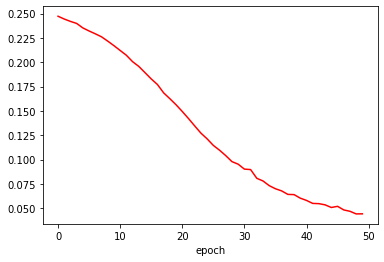

97.6


In [29]:
model9 = Sequential()
model9.add(Dense(50, input_dim=2))
model9.add(Dense(40, activation = 'relu'))
model9.add(Dense(1, activation = 'sigmoid'))
model9.compile(loss='mean_squared_error', optimizer=adam_v2.Adam(learning_rate=0.001), metrics=['accuracy'])
l = model9.fit(x_train, label_train, epochs=50)
_, accuracy = model9.evaluate(x_train, label_train)
accuracy = accuracy*100
print("Accuracy:")
print(accuracy)
plt.plot(l.history['accuracy'], color='green', label='Accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(l.history['loss'], color='red', label='Loss')
plt.xlabel('epoch')
plt.show()
predicts = (model9.predict(x_test) > 0.5).astype(int)
counter = 0
for i in range(len(predicts)):
    if label_test[i] == predicts[i]:
        counter = counter + 1 
print(counter/len(predicts)*100)

باتوجه به نتایجی که در قسمت‌های قبلی بدست آوردیم، نتیجه گرفتیم که تعدادی لایه‌ی پنهان برای عملکرد بهتر شبکه عصبی لازم است همچنین از ترکیب توابع فعالیت relu و sigmoid استفاده کرده‌ایم و همچنین با بررسی‌های صورت گرفته نتیجه گرفتیم که نرخ یادگیری ۰.۰۰۱ نتیجه بسیار خوبی به ما می‌دهد و همچنین تعداد epoch را نیز ۵۰ در نظر گرفته‌ایم و همانطور که مشاهده می‌شود به صحت قابل توجهی رسیده‌ایم

Section 2

Epoch 1/5
3000/3000 [==============================] - 68s 23ms/step - loss: 0.6734 - accuracy: 0.8222
Epoch 2/5
3000/3000 [==============================] - 71s 24ms/step - loss: 0.3899 - accuracy: 0.8596
Epoch 3/5
3000/3000 [==============================] - 70s 23ms/step - loss: 0.4059 - accuracy: 0.8522
Epoch 4/5
3000/3000 [==============================] - 71s 24ms/step - loss: 0.3866 - accuracy: 0.8590
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3614 - accuracy: 0.8674
Accuracy:
86.73999905586243


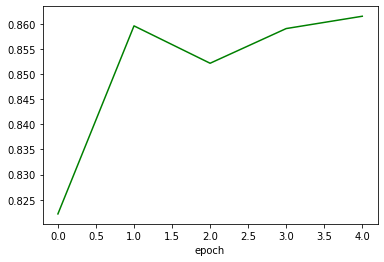

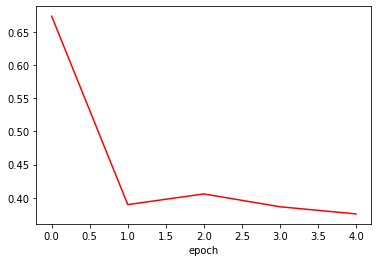

84.7


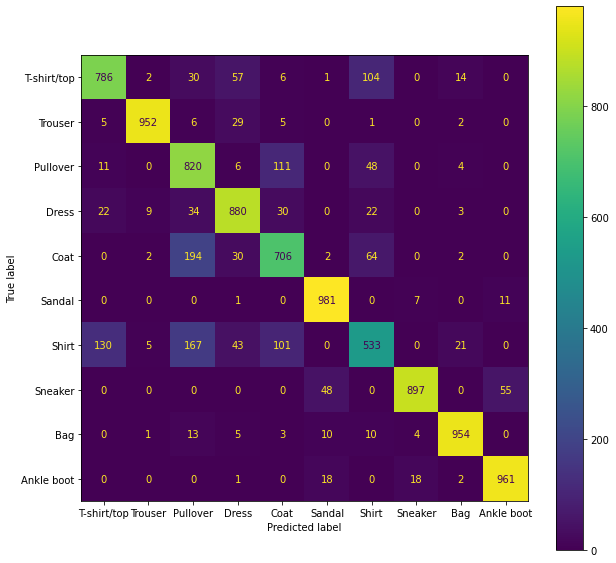

In [30]:
(x_train, label_train), (x_test, label_test) = fashion_mnist.load_data()
#print(x_train)
#print(label_train)
#print(x_test)
#print(label_test)
label_train = to_categorical(label_train)
label_test = to_categorical(label_test)
#print(label_train)
#print(label_test)
model10 = Sequential()
model10.add(Dense(80, input_shape=(28, 28, 1), activation = 'relu'))
model10.add(Dense(60, activation = 'relu'))
model10.add(Dense(40, activation = 'relu'))
model10.add(Flatten())
model10.add(Dense(10, activation = 'softmax'))
model10.compile(loss='categorical_crossentropy', optimizer=adam_v2.Adam(learning_rate=0.001), metrics=['accuracy'])
l = model10.fit(x_train, label_train, epochs=5, batch_size=20)
_, accuracy = model10.evaluate(x_train, label_train)
accuracy = accuracy*100
print("Accuracy:")
print(accuracy)
plt.plot(l.history['accuracy'], color='green', label='Accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(l.history['loss'], color='red', label='Loss')
plt.xlabel('epoch')
plt.show()
predicts = (model10.predict(x_test))
counter = 0
for i in range(len(predicts)):
    if np.argmax(label_test[i]) == np.argmax(predicts[i]):
        counter = counter + 1 
print(counter/len(predicts)*100)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(np.argmax(label_test, axis=1), np.argmax(predicts, axis=1)), display_labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"])
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

طبق خواسته سوال مجموعه داده‌ی موردنظر را دسته‌بندی کرده‌ایم و همانطور که مشاهده می‌شود عملکرد خوبی دارد و ماتریس درهم ریختگی آن را نیز رسم کرده‌ایم.